In [0]:
!pip install imblearn

In [0]:
import numpy as np
import pandas as pd
pd.set_option("max_column", None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from scipy.stats import chisquare
import warnings
warnings.filterwarnings("ignore")

In [0]:
dataset = pd.read_csv("JM1.csv")

In [64]:
dataset.head()

,log,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51,10,8,1,17.0,36.0,112.0,86.0,13.0,1
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129,29,28,2,17.0,135.0,329.0,271.0,5.0,1
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28,1,6,0,11.0,16.0,76.0,50.0,7.0,1


In [0]:
dataset.rename(columns = {
    "log" : "mc_line_count",
    "v(g)" : "cyclomatic_complexity",
    "ev(g)" : "essential_complexity",
    "iv(g)" : "design_complexity",
    "n" : "total_operators&operands",
    "v" : "volume",
    "l" : "program_length",
    "d" : "difficulty",
    "i" : "intelligence",
    "e" : "effort",
    "b" : "Halstead_b",
    "t" : "time_estimator",
    "uniq_Opnd ": "uniq_Opnd",
    "lOBlank " : "lOBlank"
}, inplace=True)

In [66]:
dataset.head()

,mc_line_count,cyclomatic_complexity,essential_complexity,design_complexity,total_operators&operands,volume,program_length,difficulty,intelligence,effort,Halstead_b,time_estimator,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51,10,8,1,17.0,36.0,112.0,86.0,13.0,1
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129,29,28,2,17.0,135.0,329.0,271.0,5.0,1
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28,1,6,0,11.0,16.0,76.0,50.0,7.0,1


In [67]:
dataset.shape

(10887, 22)

In [68]:
dataset.isnull().sum()

mc_line_count               0
cyclomatic_complexity       0
essential_complexity        0
design_complexity           0
total_operators&operands    0
volume                      0
program_length              0
difficulty                  0
intelligence                0
effort                      0
Halstead_b                  0
time_estimator              0
lOCode                      0
lOComment                   0
lOBlank                     0
lOCodeAndComment            0
uniq_Op                     0
uniq_Opnd                   0
total_Op                    0
total_Opnd                  0
branchCount                 0
defects                     0
dtype: int64

### Label distribution

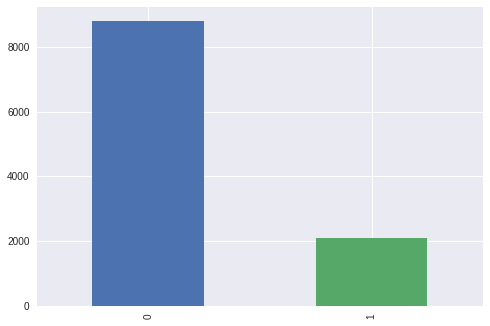

In [69]:
dataset["defects"].value_counts().plot.bar()

### Statistical Description

In [70]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
mc_line_count,10887.0,42.008460,76.588413,0.0,11.00,23.00,46.00,3442.00
cyclomatic_complexity,10887.0,6.347424,13.018783,0.0,2.00,3.00,7.00,470.00
essential_complexity,10887.0,3.400423,6.771404,0.0,1.00,1.00,3.00,165.00
design_complexity,10887.0,4.000863,9.116213,0.0,1.00,2.00,4.00,402.00
total_operators&operands,10887.0,114.368724,249.483987,0.0,14.00,49.00,119.00,8441.00
volume,10887.0,673.634245,1938.699588,0.0,48.43,217.13,621.06,80843.08
program_length,10887.0,0.135310,0.160534,0.0,0.03,0.08,0.16,1.30
difficulty,10887.0,14.174633,18.709168,0.0,3.00,9.09,18.90,418.20
intelligence,10887.0,29.434136,34.417464,0.0,11.86,21.92,36.78,569.78
effort,10887.0,36829.598306,434328.184853,0.0,161.67,2031.02,11416.24,31079782.27


### Correlation

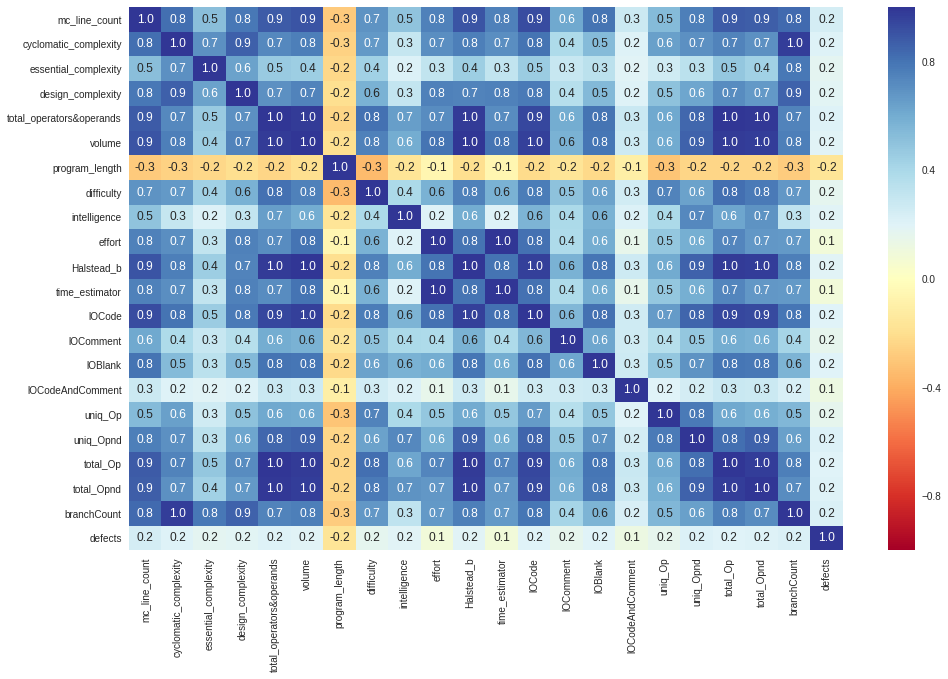

In [71]:
plt.subplots(figsize=(16, 10))
sns.heatmap(dataset.corr(), annot = True, fmt=".1f", cmap="RdYlBu")

In [72]:
dataset.columns

Index(['mc_line_count', 'cyclomatic_complexity', 'essential_complexity',
       'design_complexity', 'total_operators&operands', 'volume',
       'program_length', 'difficulty', 'intelligence', 'effort', 'Halstead_b',
       'time_estimator', 'lOCode', 'lOComment', 'lOBlank', 'lOCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount',
       'defects'],
      dtype='object')

### Removing Correlated Feature
__Total 6 highly correlated feature found where $r$ = 1.0__ 

In [0]:
del dataset["total_Opnd"]
del dataset["Halstead_b"]
del dataset["total_Op"]
del dataset["effort"]
del dataset["branchCount"]
del dataset["volume"]

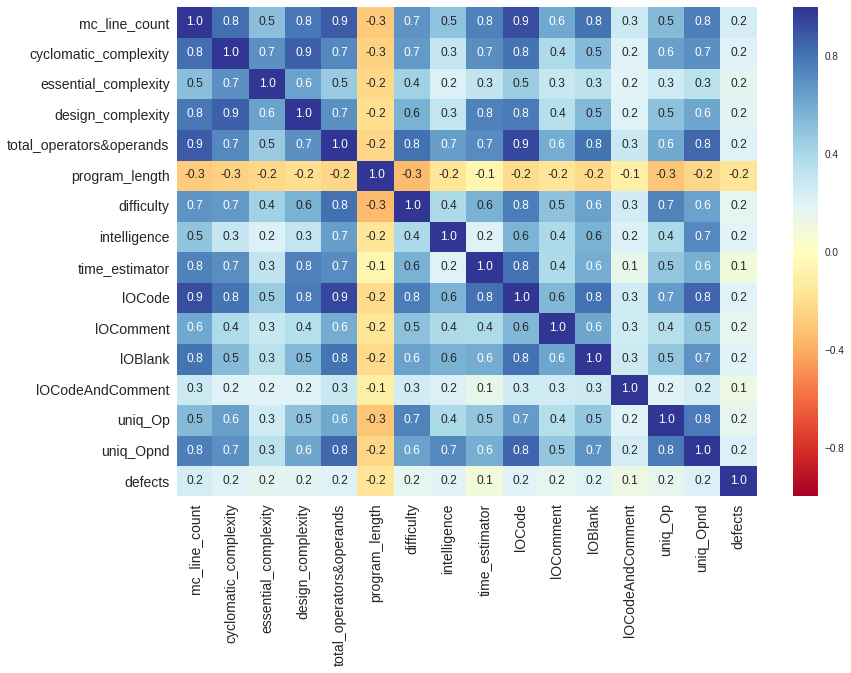

In [74]:
plt.subplots(figsize=(13, 9))
sns.heatmap(dataset.corr(), annot = True, fmt=".1f", cmap="RdYlBu")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Feature Scaling

In [0]:
scaler = MinMaxScaler()

dataset["mc_line_count"] = scaler.fit_transform(np.array(dataset["mc_line_count"]).reshape(len(dataset["mc_line_count"]), -1))
dataset["difficulty"] = scaler.fit_transform(np.array(dataset["difficulty"]).reshape(len(dataset["difficulty"]), -1))
dataset["intelligence"] = scaler.fit_transform(np.array(dataset["intelligence"]).reshape(len(dataset["intelligence"]), -1))
dataset["time_estimator"] = scaler.fit_transform(np.array(dataset["time_estimator"]).reshape(len(dataset["time_estimator"]), -1))
dataset["lOCode"] = scaler.fit_transform(np.array(dataset["lOCode"]).reshape(len(dataset["lOCode"]), -1))
dataset["uniq_Opnd"] = scaler.fit_transform(np.array(dataset["uniq_Opnd"]).reshape(len(dataset["uniq_Opnd"]), -1))
dataset["cyclomatic_complexity"] = scaler.fit_transform(np.array(dataset["cyclomatic_complexity"]).reshape(len(dataset["cyclomatic_complexity"]), -1))
dataset["cyclomatic_complexity"] = scaler.fit_transform(np.array(dataset["cyclomatic_complexity"]).reshape(len(dataset["cyclomatic_complexity"]), -1))
dataset["essential_complexity"] = scaler.fit_transform(np.array(dataset["essential_complexity"]).reshape(len(dataset["essential_complexity"]), -1))
dataset["design_complexity"] = scaler.fit_transform(np.array(dataset["design_complexity"]).reshape(len(dataset["design_complexity"]), -1))
dataset["lOComment"] = scaler.fit_transform(np.array(dataset["lOComment"]).reshape(len(dataset["lOComment"]), -1))
dataset["lOBlank"] = scaler.fit_transform(np.array(dataset["lOBlank"]).reshape(len(dataset["lOBlank"]), -1))
dataset["lOCodeAndComment"] = scaler.fit_transform(np.array(dataset["lOCodeAndComment"]).reshape(len(dataset["lOCodeAndComment"]), -1))
dataset["uniq_Op"] = scaler.fit_transform(np.array(dataset["uniq_Op"]).reshape(len(dataset["uniq_Op"]), -1))
dataset["program_length"] = scaler.fit_transform(np.array(dataset["program_length"]).reshape(len(dataset["program_length"]), -1))
dataset["total_operators&operands"] = scaler.fit_transform(np.array(dataset["total_operators&operands"]).reshape(len(dataset["total_operators&operands"]), -1))

In [76]:
dataset.describe()

,mc_line_count,cyclomatic_complexity,essential_complexity,design_complexity,total_operators&operands,program_length,difficulty,intelligence,time_estimator,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,defects
count,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000
mean,0.012205,0.013505,0.020609,0.009952,0.013549,0.104085,0.033894,0.051659,0.001185,0.009294,0.007956,0.010346,0.003433,0.027179,0.016317,0.193442
std,0.022251,0.027700,0.041039,0.022677,0.029556,0.123488,0.044737,0.060405,0.013975,0.021107,0.026186,0.022298,0.017665,0.024443,0.025987,0.395014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003196,0.004255,0.006061,0.002488,0.001659,0.023077,0.007174,0.020815,0.000005,0.001416,0.000000,0.000000,0.000000,0.012165,0.003899,0.000000
50%,0.006682,0.006383,0.006061,0.004975,0.005805,0.061538,0.021736,0.038471,0.000065,0.004603,0.000000,0.004474,0.000000,0.026764,0.010721,0.000000
75%,0.013364,0.014894,0.018182,0.009950,0.014098,0.123077,0.045194,0.064551,0.000367,0.009915,0.005814,0.011186,0.000000,0.038929,0.020468,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
X = dataset.drop("defects", axis=1)
y = dataset["defects"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [78]:
X.describe()

,mc_line_count,cyclomatic_complexity,essential_complexity,design_complexity,total_operators&operands,program_length,difficulty,intelligence,time_estimator,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd
count,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000,10887.000000
mean,0.012205,0.013505,0.020609,0.009952,0.013549,0.104085,0.033894,0.051659,0.001185,0.009294,0.007956,0.010346,0.003433,0.027179,0.016317
std,0.022251,0.027700,0.041039,0.022677,0.029556,0.123488,0.044737,0.060405,0.013975,0.021107,0.026186,0.022298,0.017665,0.024443,0.025987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003196,0.004255,0.006061,0.002488,0.001659,0.023077,0.007174,0.020815,0.000005,0.001416,0.000000,0.000000,0.000000,0.012165,0.003899
50%,0.006682,0.006383,0.006061,0.004975,0.005805,0.061538,0.021736,0.038471,0.000065,0.004603,0.000000,0.004474,0.000000,0.026764,0.010721
75%,0.013364,0.014894,0.018182,0.009950,0.014098,0.123077,0.045194,0.064551,0.000367,0.009915,0.005814,0.011186,0.000000,0.038929,0.020468
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Chi Square Test

In [79]:
result = pd.DataFrame(columns=["Features", "Chi2Weights"])

for i in range(len(X.columns)):
    chi2, p = chisquare(X[X.columns[i]])
    result = result.append([pd.Series([X.columns[i], chi2], index = result.columns)], ignore_index=True)

result = result.sort_values(by="Chi2Weights", ascending=False)
result

,Features,Chi2Weights
8,time_estimator,1794.028656
5,program_length,1594.887654
12,lOCodeAndComment,989.617448
10,lOComment,938.153486
2,essential_complexity,889.629120
7,intelligence,768.895928
4,total_operators&operands,701.863254
6,difficulty,642.808201
1,cyclomatic_complexity,618.463055
3,design_complexity,562.493479


## Random Forest Importance

In [80]:
clf_rf = RandomForestClassifier(random_state=1, n_estimators=220)
pred_rf = clf_rf.fit(X_train, y_train).predict(X_test)
accuracy_score(pred_rf, y_test)

0.8241505968778696

In [81]:
rf_feature_importance = pd.DataFrame(clf_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
rf_feature_importance

,importance
mc_line_count,0.149059
intelligence,0.084143
time_estimator,0.082824
total_operators&operands,0.078428
cyclomatic_complexity,0.077434
difficulty,0.075016
lOCode,0.067324
uniq_Opnd,0.065663
design_complexity,0.063474
lOBlank,0.060374


## Model Building (With 15 Processed Feature)

In [82]:
# Artificial Neural Network

clf_mlp = MLPClassifier(activation='relu', solver='adam', alpha = 1e-5, hidden_layer_sizes=(5, 10), random_state=1, learning_rate = "invscaling")
pred_mlp = clf_mlp.fit(X_train, y_train).predict(X_test)
acc_mlp = accuracy_score(pred_mlp, y_test)

print("Accuracy Score: ", acc_mlp)
print(classification_report(pred_mlp, y_test))

Accuracy Score:  0.8131313131313131
              precision    recall  f1-score   support

           0       0.99      0.82      0.89      2121
           1       0.10      0.74      0.17        57

   micro avg       0.81      0.81      0.81      2178
   macro avg       0.54      0.78      0.53      2178
weighted avg       0.97      0.81      0.88      2178



In [83]:
# Support Vector Machine

clf_svc = SVC(C=10)
pred_svc = clf_svc.fit(X_train, y_train).predict(X_test)
acc_svc = accuracy_score(pred_svc, y_test)

print("Accuracy Score: ", acc_svc)
print(classification_report(pred_svc, y_test))

Accuracy Score:  0.8011937557392103
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      2175
           1       0.00      0.67      0.01         3

   micro avg       0.80      0.80      0.80      2178
   macro avg       0.50      0.73      0.45      2178
weighted avg       1.00      0.80      0.89      2178



In [84]:
# K Nearest Neighbors

clf_knn = KNeighborsClassifier()
pred_knn = clf_knn.fit(X_train, y_train).predict(X_test)
acc_knn = accuracy_score(pred_knn, y_test)

print("Accuracy Score: ", acc_knn)
print(classification_report(pred_knn, y_test))

Accuracy Score:  0.800734618916437
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1944
           1       0.27      0.50      0.35       234

   micro avg       0.80      0.80      0.80      2178
   macro avg       0.60      0.67      0.62      2178
weighted avg       0.86      0.80      0.83      2178



In [85]:
# Gaussian Naive Bayes

clf_gnb = GaussianNB()
pred_gnb = clf_gnb.fit(X_train, y_train).predict(X_test)
acc_gnb = accuracy_score(pred_gnb, y_test)

print("Accuracy Score: ", acc_gnb)
print(classification_report(pred_gnb, y_test))

Accuracy Score:  0.8039485766758494
              precision    recall  f1-score   support

           0       0.94      0.83      0.89      1973
           1       0.24      0.52      0.33       205

   micro avg       0.80      0.80      0.80      2178
   macro avg       0.59      0.68      0.61      2178
weighted avg       0.88      0.80      0.83      2178



In [86]:
# Random Forest Classifier

clf_rf = RandomForestClassifier(random_state=1, n_estimators=220)
pred_rf = clf_rf.fit(X_train, y_train).predict(X_test)
acc_rf = accuracy_score(pred_rf, y_test)

print("Accuracy Score: ", acc_rf)
print(classification_report(pred_rf, y_test))

Accuracy Score:  0.8241505968778696
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2015
           1       0.25      0.66      0.36       163

   micro avg       0.82      0.82      0.82      2178
   macro avg       0.61      0.75      0.63      2178
weighted avg       0.91      0.82      0.86      2178



In [87]:
# Decision Tree Classifier

clf_dt = DecisionTreeClassifier(random_state=2)
pred_dt = clf_dt.fit(X_train, y_train).predict(X_test)
acc_dt = accuracy_score(pred_dt, y_test)

print("Accuracy Score: ", acc_dt)
print(classification_report(pred_dt, y_test))

Accuracy Score:  0.7598714416896235
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1713
           1       0.43      0.40      0.42       465

   micro avg       0.76      0.76      0.76      2178
   macro avg       0.64      0.63      0.63      2178
weighted avg       0.75      0.76      0.76      2178



In [88]:
# Logistic Regression

clf_lr = LogisticRegression()
pred_lr = clf_lr.fit(X_train,y_train).predict(X_test)
acc_lr = accuracy_score(pred_lr, y_test)

print("Accuracy Score: ", acc_lr)
print(classification_report(pred_lr, y_test))

Accuracy Score:  0.8080808080808081
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      2140
           1       0.06      0.71      0.11        38

   micro avg       0.81      0.81      0.81      2178
   macro avg       0.53      0.76      0.50      2178
weighted avg       0.98      0.81      0.88      2178



## Model Building with Reduced Feature (Top 3)

In [89]:
print(rf_feature_importance[:3].index.values)

['mc_line_count' 'intelligence' 'time_estimator']


In [0]:
X_re = X[rf_feature_importance[:3].index.values]

X_re_train, X_re_test, y_train, y_test = train_test_split(X_re, y, test_size=0.2, random_state=1)

In [91]:
# Artificial Neural Network

clf_re_mlp = MLPClassifier(activation='relu', solver='adam', alpha = 1e-5, hidden_layer_sizes=(5, 10), random_state=1, learning_rate = "invscaling")
pred_re_mlp = clf_re_mlp.fit(X_re_train, y_train).predict(X_re_test)
acc_re_mlp = accuracy_score(pred_re_mlp, y_test)

print("Accuracy Score: ", acc_re_mlp)
print(classification_report(pred_re_mlp, y_test))

Accuracy Score:  0.8112947658402204
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      2083
           1       0.14      0.62      0.22        95

   micro avg       0.81      0.81      0.81      2178
   macro avg       0.56      0.72      0.56      2178
weighted avg       0.94      0.81      0.86      2178



In [92]:
# Support Vector Machine

clf_re_svc = SVC(C=10)
pred_re_svc = clf_re_svc.fit(X_re_train, y_train).predict(X_re_test)
acc_re_svc = accuracy_score(pred_re_svc, y_test)

print("Accuracy Score: ", acc_re_svc)
print(classification_report(pred_re_svc, y_test))

Accuracy Score:  0.8016528925619835
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      2176
           1       0.00      1.00      0.01         2

   micro avg       0.80      0.80      0.80      2178
   macro avg       0.50      0.90      0.45      2178
weighted avg       1.00      0.80      0.89      2178



In [93]:
# K Nearest Neighbors

clf_re_knn = KNeighborsClassifier()
pred_re_knn = clf_re_knn.fit(X_re_train, y_train).predict(X_re_test)
acc_re_knn = accuracy_score(pred_re_knn, y_test)

print("Accuracy Score: ", acc_re_knn)
print(classification_report(pred_re_knn, y_test))

Accuracy Score:  0.7851239669421488
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1946
           1       0.23      0.43      0.30       232

   micro avg       0.79      0.79      0.79      2178
   macro avg       0.58      0.63      0.59      2178
weighted avg       0.85      0.79      0.81      2178



In [94]:
# Gaussian Naive Bayes

clf_re_gnb = GaussianNB()
pred_re_gnb = clf_re_gnb.fit(X_re_train, y_train).predict(X_re_test)
acc_re_gnb = accuracy_score(pred_re_gnb, y_test)

print("Accuracy Score: ", acc_re_gnb)
print(classification_report(pred_re_gnb, y_test))

Accuracy Score:  0.8089990817263545
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2060
           1       0.16      0.58      0.25       118

   micro avg       0.81      0.81      0.81      2178
   macro avg       0.56      0.70      0.57      2178
weighted avg       0.93      0.81      0.86      2178



In [95]:
# Random Forest Classifier

clf_re_rf = RandomForestClassifier(random_state=1, n_estimators=220)
pred_re_rf = clf_re_rf.fit(X_re_train, y_train).predict(X_re_test)
acc_re_rf = accuracy_score(pred_re_rf, y_test)

print("Accuracy Score: ", acc_re_rf)
print(classification_report(pred_re_rf, y_test))

Accuracy Score:  0.8099173553719008
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1988
           1       0.24      0.55      0.34       190

   micro avg       0.81      0.81      0.81      2178
   macro avg       0.60      0.69      0.61      2178
weighted avg       0.89      0.81      0.84      2178



In [96]:
# Decision Tree Classifier

clf_re_dt = DecisionTreeClassifier(random_state = 2)
pred_re_dt = clf_re_dt.fit(X_re_train, y_train).predict(X_re_test)
acc_re_dt = accuracy_score(pred_re_dt, y_test)

print("Accuracy Score: ", acc_re_dt)
print(classification_report(pred_re_dt, y_test))

Accuracy Score:  0.7456382001836547
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1780
           1       0.32      0.35      0.33       398

   micro avg       0.75      0.75      0.75      2178
   macro avg       0.59      0.59      0.59      2178
weighted avg       0.75      0.75      0.75      2178



In [97]:
# Logistic Regression

clf_re_lr = LogisticRegression()
pred_re_lr = clf_re_lr.fit(X_re_train,y_train).predict(X_re_test)
acc_re_lr = accuracy_score(pred_re_lr, y_test)

print("Accuracy Score: ", acc_re_lr)
print(classification_report(pred_re_lr, y_test))

Accuracy Score:  0.8044077134986226
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      2156
           1       0.03      0.68      0.07        22

   micro avg       0.80      0.80      0.80      2178
   macro avg       0.52      0.74      0.48      2178
weighted avg       0.99      0.80      0.88      2178



## Over Sampling with SMOTE

In [0]:
sm  = SMOTE(random_state = 1)
X_res, y_res = sm.fit_sample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.2, random_state=7)

In [99]:
# Artificial Neural Network

clf_sm_mlp = MLPClassifier(activation='relu', solver='adam', alpha = 1e-5, hidden_layer_sizes=(5, 10), random_state=1, learning_rate = "invscaling")
pred_sm_mlp = clf_sm_mlp.fit(X_train, y_train).predict(X_test)
acc_sm_mlp = accuracy_score(pred_sm_mlp, y_test)

print("Accuracy Score: ", acc_sm_mlp)
print(classification_report(pred_sm_mlp, y_test))

Accuracy Score:  0.6626814688300597
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1793
           1       0.65      0.66      0.66      1720

   micro avg       0.66      0.66      0.66      3513
   macro avg       0.66      0.66      0.66      3513
weighted avg       0.66      0.66      0.66      3513



In [100]:
# Support Vector Machine

clf_sm_svc = SVC(C=10)
pred_sm_svc = clf_sm_svc.fit(X_train, y_train).predict(X_test)
acc_sm_svc = accuracy_score(pred_sm_svc, y_test)

print("Accuracy Score: ", acc_sm_svc)
print(classification_report(pred_sm_svc, y_test))

Accuracy Score:  0.6299459151722174
              precision    recall  f1-score   support

           0       0.87      0.59      0.71      2626
           1       0.38      0.74      0.50       887

   micro avg       0.63      0.63      0.63      3513
   macro avg       0.63      0.67      0.60      3513
weighted avg       0.75      0.63      0.65      3513



In [101]:
# K Nearest Neighbors

clf_sm_knn = KNeighborsClassifier()
pred_sm_knn = clf_sm_knn.fit(X_train, y_train).predict(X_test)
acc_sm_knn = accuracy_score(pred_sm_knn, y_test)

print("Accuracy Score: ", acc_sm_knn)
print(classification_report(pred_sm_knn, y_test))

Accuracy Score:  0.7902077996014802
              precision    recall  f1-score   support

           0       0.67      0.89      0.76      1341
           1       0.91      0.73      0.81      2172

   micro avg       0.79      0.79      0.79      3513
   macro avg       0.79      0.81      0.79      3513
weighted avg       0.82      0.79      0.79      3513



In [102]:
# Gaussian Naive Bayes

clf_sm_gnb = GaussianNB()
pred_sm_gnb = clf_sm_gnb.fit(X_train, y_train).predict(X_test)
acc_sm_gnb = accuracy_score(pred_sm_gnb, y_test)

print("Accuracy Score: ", acc_sm_gnb)
print(classification_report(pred_sm_gnb, y_test))

Accuracy Score:  0.5983489894676914
              precision    recall  f1-score   support

           0       0.94      0.56      0.70      2983
           1       0.25      0.80      0.38       530

   micro avg       0.60      0.60      0.60      3513
   macro avg       0.59      0.68      0.54      3513
weighted avg       0.84      0.60      0.65      3513



In [103]:
# Random Forest Classifier

clf_sm_rf = RandomForestClassifier(random_state=1, n_estimators=220)
pred_sm_rf = clf_sm_rf.fit(X_train, y_train).predict(X_test)
acc_sm_rf = accuracy_score(pred_sm_rf, y_test)

print("Accuracy Score: ", acc_sm_rf)
print(classification_report(pred_sm_rf, y_test))

Accuracy Score:  0.8935382863649303
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1798
           1       0.89      0.90      0.89      1715

   micro avg       0.89      0.89      0.89      3513
   macro avg       0.89      0.89      0.89      3513
weighted avg       0.89      0.89      0.89      3513



In [104]:
# Decision Tree Classifier

clf_sm_dt = DecisionTreeClassifier(random_state=2)
pred_sm_dt = clf_sm_dt.fit(X_train, y_train).predict(X_test)
acc_sm_dt = accuracy_score(pred_sm_dt, y_test)

print("Accuracy Score: ", acc_sm_dt)
print(classification_report(pred_sm_dt, y_test))

Accuracy Score:  0.8200967833760319
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1750
           1       0.83      0.81      0.82      1763

   micro avg       0.82      0.82      0.82      3513
   macro avg       0.82      0.82      0.82      3513
weighted avg       0.82      0.82      0.82      3513



In [105]:
# Logistic Regression

clf_sm_lr = LogisticRegression()
pred_sm_lr = clf_sm_lr.fit(X_train, y_train).predict(X_test)
acc_sm_lr = accuracy_score(pred_sm_lr, y_test)

print("Accuracy Score: ", acc_sm_lr)
print(classification_report(pred_sm_lr, y_test))

Accuracy Score:  0.654711073156846
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1893
           1       0.62      0.66      0.64      1620

   micro avg       0.65      0.65      0.65      3513
   macro avg       0.65      0.66      0.65      3513
weighted avg       0.66      0.65      0.66      3513



## ADASYN

In [0]:
ada = ADASYN()
X_resampled, y_resampled = ada.fit_sample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

In [107]:
pd.Series(y_resampled).value_counts()

1    9212
0    8781
dtype: int64

In [108]:
# Artificial Neural Network

clf_ada_mlp = MLPClassifier(activation='relu', solver='adam', alpha = 1e-5, hidden_layer_sizes=(5, 10), random_state=1, learning_rate = "invscaling")
pred_ada_mlp = clf_ada_mlp.fit(X_train, y_train).predict(X_test)
acc_ada_mlp = accuracy_score(pred_ada_mlp, y_test)

print("Accuracy Score: ", acc_ada_mlp)
print(classification_report(pred_ada_mlp, y_test))

Accuracy Score:  0.6518477354820783
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1770
           1       0.66      0.66      0.66      1829

   micro avg       0.65      0.65      0.65      3599
   macro avg       0.65      0.65      0.65      3599
weighted avg       0.65      0.65      0.65      3599



In [109]:
# Support Vector Machine

clf_ada_svc = SVC(C=10)
pred_ada_svc = clf_ada_svc.fit(X_train, y_train).predict(X_test)
acc_ada_svc = accuracy_score(pred_ada_svc, y_test) 

print("Accuracy Score: ",acc_ada_svc)
print(classification_report(pred_ada_svc, y_test))

Accuracy Score:  0.6004445679355377
              precision    recall  f1-score   support

           0       0.37      0.68      0.48       973
           1       0.83      0.57      0.68      2626

   micro avg       0.60      0.60      0.60      3599
   macro avg       0.60      0.62      0.58      3599
weighted avg       0.70      0.60      0.62      3599



In [110]:
# K Nearest Neighbors

clf_ada_knn = KNeighborsClassifier()
pred_ada_knn = clf_ada_knn.fit(X_train, y_train).predict(X_test)
acc_ada_knn = accuracy_score(pred_ada_knn, y_test)

print("Accuracy Score: ", acc_ada_knn)
print(classification_report(pred_ada_knn, y_test))

Accuracy Score:  0.7888302306196165
              precision    recall  f1-score   support

           0       0.65      0.89      0.75      1295
           1       0.92      0.73      0.82      2304

   micro avg       0.79      0.79      0.79      3599
   macro avg       0.79      0.81      0.78      3599
weighted avg       0.83      0.79      0.79      3599



In [111]:
# Gaussian Naive Bayes

clf_ada_gnb = GaussianNB()
pred_ada_gnb = clf_ada_gnb.fit(X_train, y_train).predict(X_test)
acc_ada_gnb = accuracy_score(pred_ada_gnb, y_test)

print("Accuracy Score: ", acc_ada_gnb)
print(classification_report(pred_ada_gnb, y_test))

Accuracy Score:  0.5665462628507919
              precision    recall  f1-score   support

           0       0.93      0.54      0.68      3101
           1       0.21      0.76      0.33       498

   micro avg       0.57      0.57      0.57      3599
   macro avg       0.57      0.65      0.50      3599
weighted avg       0.83      0.57      0.63      3599



In [112]:
# Random Forest Classifier

clf_ada_rf = RandomForestClassifier(random_state=1, n_estimators=220)
pred_ada_rf = clf_ada_rf.fit(X_train, y_train).predict(X_test)
acc_ada_rf = accuracy_score(pred_ada_rf, y_test)

print("Accuracy Score: ", acc_ada_rf)
print(classification_report(pred_ada_rf, y_test))

Accuracy Score:  0.8930258405112531
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1762
           1       0.90      0.89      0.89      1837

   micro avg       0.89      0.89      0.89      3599
   macro avg       0.89      0.89      0.89      3599
weighted avg       0.89      0.89      0.89      3599



In [113]:
# Decision Tree Classifier

clf_ada_dt = DecisionTreeClassifier()
pred_ada_dt = clf_ada_dt.fit(X_train, y_train).predict(X_test)
acc_ada_dt = accuracy_score(pred_ada_dt, y_test)

print("Accuracy Score: ", acc_ada_dt)
print(classification_report(pred_ada_dt, y_test))

Accuracy Score:  0.8266185051403168
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1779
           1       0.83      0.83      0.83      1820

   micro avg       0.83      0.83      0.83      3599
   macro avg       0.83      0.83      0.83      3599
weighted avg       0.83      0.83      0.83      3599



In [114]:
# Logistic Regression

clf_ada_lr = LogisticRegression()
pred_ada_lr = clf_ada_lr.fit(X_train, y_train).predict(X_test)
acc_ada_lr = accuracy_score(pred_ada_lr, y_test)

print("Accuracy Score: ", acc_ada_lr)
print(classification_report(pred_ada_lr, y_test))

Accuracy Score:  0.6360100027785496
              precision    recall  f1-score   support

           0       0.59      0.64      0.61      1623
           1       0.68      0.63      0.65      1976

   micro avg       0.64      0.64      0.64      3599
   macro avg       0.64      0.64      0.63      3599
weighted avg       0.64      0.64      0.64      3599



## Combine Sampling

In [0]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(X, y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

In [117]:
# Artificial Neural Network

clf_cm_mlp = MLPClassifier(activation='relu', solver='adam', alpha = 1e-5, hidden_layer_sizes=(5, 10), random_state=1, learning_rate = "invscaling")
pred_cm_mlp = clf_cm_mlp.fit(X_train, y_train).predict(X_test)
acc_cm_mlp = accuracy_score(pred_cm_mlp, y_test)

print("Accuracy Score: ", acc_cm_mlp)
print(classification_report(pred_cm_mlp, y_test))

Accuracy Score:  0.7778234086242299
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1000
           1       0.82      0.80      0.81      1435

   micro avg       0.78      0.78      0.78      2435
   macro avg       0.77      0.77      0.77      2435
weighted avg       0.78      0.78      0.78      2435



In [118]:
# Support Vector Machine

clf_cm_svc = SVC(C=10)
pred_cm_svc = clf_cm_svc.fit(X_train, y_train).predict(X_test)
acc_cm_svc = accuracy_score(pred_cm_svc, y_test)

print("Accuracy Score: ", acc_cm_svc)
print(classification_report(pred_cm_svc, y_test))

Accuracy Score:  0.6948665297741273
              precision    recall  f1-score   support

           0       0.41      0.75      0.53       556
           1       0.90      0.68      0.77      1879

   micro avg       0.69      0.69      0.69      2435
   macro avg       0.65      0.71      0.65      2435
weighted avg       0.79      0.69      0.72      2435



In [119]:
# K Nearest Neighbors

clf_cm_knn = KNeighborsClassifier(n_neighbors=10)
pred_cm_knn = clf_cm_knn.fit(X_train, y_train).predict(X_test)
acc_cm_knn = accuracy_score(pred_cm_knn, y_test)

print("Accuracy Score: ", acc_cm_knn)
print(classification_report(pred_cm_knn, y_test))

Accuracy Score:  0.8948665297741273
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       953
           1       0.93      0.89      0.91      1482

   micro avg       0.89      0.89      0.89      2435
   macro avg       0.89      0.90      0.89      2435
weighted avg       0.90      0.89      0.90      2435



In [120]:
# Gaussian Naive Bayes

clf_cm_gnb = GaussianNB()
pred_cm_gnb = clf_cm_gnb.fit(X_train, y_train).predict(X_test)
acc_cm_gnb = accuracy_score(pred_cm_gnb, y_test)

print("Accuracy Score: ", acc_cm_gnb)
print(classification_report(pred_cm_gnb, y_test))

Accuracy Score:  0.6168377823408624
              precision    recall  f1-score   support

           0       0.96      0.52      0.68      1878
           1       0.37      0.93      0.53       557

   micro avg       0.62      0.62      0.62      2435
   macro avg       0.67      0.73      0.60      2435
weighted avg       0.83      0.62      0.64      2435



In [121]:
# Random Forest Classifier

clf_cm_rf = RandomForestClassifier(random_state=1, n_estimators=10)
pred_cm_rf = clf_cm_rf.fit(X_train, y_train).predict(X_test)
acc_cm_rf = accuracy_score(pred_cm_rf, y_test)

print("Accuracy Score: ", acc_cm_rf)
print(classification_report(pred_cm_rf, y_test))

Accuracy Score:  0.9375770020533881
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1015
           1       0.95      0.95      0.95      1420

   micro avg       0.94      0.94      0.94      2435
   macro avg       0.94      0.94      0.94      2435
weighted avg       0.94      0.94      0.94      2435



In [122]:
# Decision Tree Classifier

clf_cm_dt = DecisionTreeClassifier(random_state=2)
pred_cm_dt = clf_cm_dt.fit(X_train, y_train).predict(X_test)
acc_cm_dt = accuracy_score(pred_cm_dt, y_test)

print("Accuracy Score: ", acc_cm_dt)
print(classification_report(pred_cm_dt, y_test))

Accuracy Score:  0.891170431211499
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       982
           1       0.92      0.90      0.91      1453

   micro avg       0.89      0.89      0.89      2435
   macro avg       0.89      0.89      0.89      2435
weighted avg       0.89      0.89      0.89      2435



In [123]:
# Logistic Regression

clf_sm_lr = LogisticRegression()
pred_sm_lr = clf_sm_lr.fit(X_train, y_train).predict(X_test)
acc_cm_lr = accuracy_score(pred_sm_lr, y_test)

print("Accuracy Score: ", acc_cm_lr)
print(classification_report(pred_sm_lr, y_test))

Accuracy Score:  0.7359342915811088
              precision    recall  f1-score   support

           0       0.57      0.74      0.64       784
           1       0.86      0.73      0.79      1651

   micro avg       0.74      0.74      0.74      2435
   macro avg       0.71      0.74      0.72      2435
weighted avg       0.76      0.74      0.74      2435



## Accuracy Plots

#### ANN

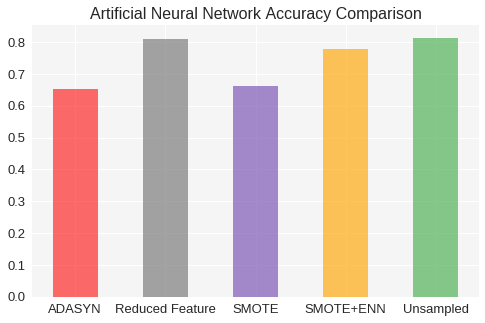

In [211]:
fig, ax  = plt.subplots(figsize=(8, 5))
ax.set_facecolor('#f5f5f5')
x_val = ["Unsampled", "SMOTE", "ADASYN", "SMOTE+ENN", "Reduced Feature"]
y_val = [acc_mlp, acc_sm_mlp, acc_ada_mlp, acc_cm_mlp, acc_re_mlp]

color = ["#4caf50aa", "#7952b3aa", "#ff2222aa", "#ffa606aa", "#777777aa"]

plt.bar(x_val, y_val, color = color, width = 0.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Artificial Neural Network Accuracy Comparison", fontsize=16)
plt.show()

### SVC

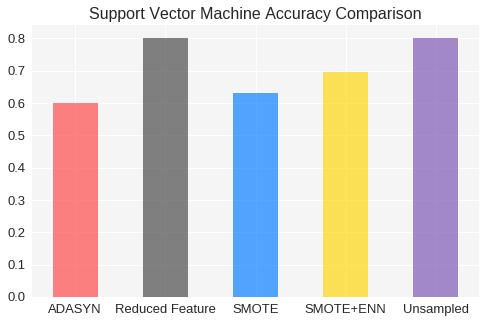

In [218]:
fig, ax  = plt.subplots(figsize=(8, 5))
ax.set_facecolor('#f5f5f5')
x_val = ["Unsampled", "SMOTE", "ADASYN", "SMOTE+ENN", "Reduced Feature"]
y_val = [acc_svc, acc_sm_svc, acc_ada_svc, acc_cm_svc, acc_re_svc]

color = ["#7952b3aa", "#007bffaa", "#ff4444aa", "#ffd606aa", "#444444aa"]

plt.bar(x_val, y_val, color = color, width = 0.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Support Vector Machine Accuracy Comparison", fontsize=16)
plt.show()

### KNN

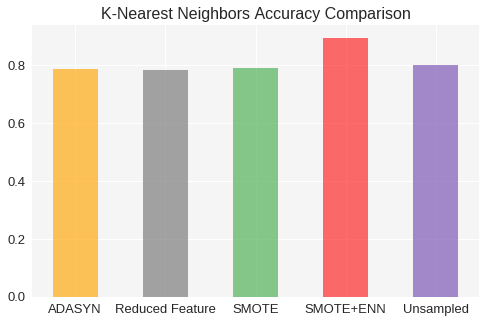

In [213]:
fig, ax  = plt.subplots(figsize=(8, 5))
ax.set_facecolor('#f5f5f5')
x_val = ["Unsampled", "SMOTE", "ADASYN", "SMOTE+ENN", "Reduced Feature"]
y_val = [acc_knn, acc_sm_knn, acc_ada_knn, acc_cm_knn, acc_re_knn]

color = ["#7952b3aa", "#4caf50aa", "#ffa606aa", "#ff2222aa", "#777777aa"]

plt.bar(x_val, y_val, color = color, width = 0.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("K-Nearest Neighbors Accuracy Comparison", fontsize=16)
plt.show()

### GNB

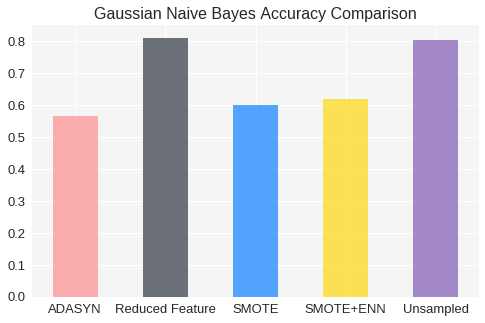

In [214]:
fig, ax  = plt.subplots(figsize=(8, 5))
ax.set_facecolor('#f5f5f5')
x_val = ["Unsampled", "SMOTE", "ADASYN", "SMOTE+ENN", "Reduced Feature"]
y_val = [acc_gnb, acc_sm_gnb, acc_ada_gnb, acc_cm_gnb, acc_re_gnb]

color = ["#7952b3aa", "#007bffaa", "#ff8888aa", "#ffd606aa", "#262c3aaa"]

plt.bar(x_val, y_val, color = color, width = 0.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Gaussian Naive Bayes Accuracy Comparison", fontsize=16)
plt.show()

### RF

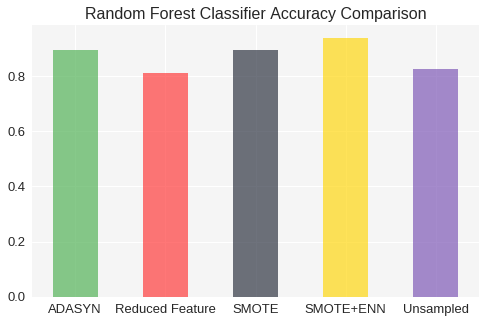

In [215]:
fig, ax  = plt.subplots(figsize=(8, 5))
ax.set_facecolor('#f5f5f5')
x_val = ["Unsampled", "SMOTE", "ADASYN", "SMOTE+ENN", "Reduced Feature"]
y_val = [acc_rf, acc_sm_rf, acc_ada_rf, acc_cm_rf, acc_re_rf]

color = ["#7952b3aa", "#262c3aaa", "#4caf50aa", "#ffd606aa", "#ff3333aa"]

plt.bar(x_val, y_val, color = color, width = 0.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Random Forest Classifier Accuracy Comparison", fontsize=16)
plt.show()

### DT

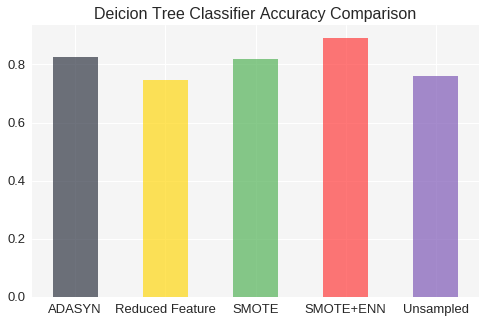

In [216]:
fig, ax  = plt.subplots(figsize=(8, 5))
ax.set_facecolor('#f5f5f5')
x_val = ["Unsampled", "SMOTE", "ADASYN", "SMOTE+ENN", "Reduced Feature"]
y_val = [acc_dt, acc_sm_dt, acc_ada_dt, acc_cm_dt, acc_re_dt]

color = ["#7952b3aa", "#4caf50aa", "#262c3aaa", "#ff3333aa", "#ffd606aa"]

plt.bar(x_val, y_val, color = color, width = 0.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Deicion Tree Classifier Accuracy Comparison", fontsize=16)
plt.show()

### LR

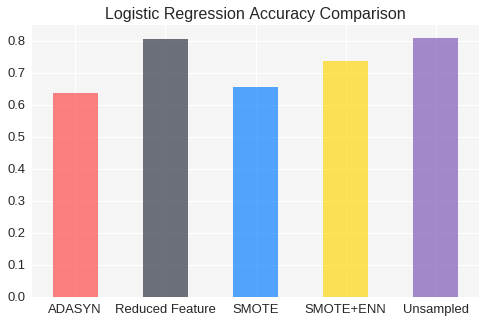

In [217]:
fig, ax  = plt.subplots(figsize=(8, 5))
ax.set_facecolor('#f5f5f5')
x_val = ["Unsampled", "SMOTE", "ADASYN", "SMOTE+ENN", "Reduced Feature"]
y_val = [acc_lr, acc_sm_lr, acc_ada_lr, acc_cm_lr, acc_re_lr]

color = ["#7952b3aa", "#007bffaa", "#ff4444aa", "#ffd606aa", "#262c3aaa"]

plt.bar(x_val, y_val, color = color, width = 0.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Logistic Regression Accuracy Comparison", fontsize=16)
plt.show()